In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
columns = ['target','ids','date','flag','user','text']

In [3]:
data = pd.read_csv('Sentiment.zip',encoding = "latin-1",header=None)

In [4]:
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
data.columns = columns

In [6]:
data.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
data.shape


(1600000, 6)

In [8]:
data = data.sample(n=500000, random_state=22)

In [9]:
data.shape

(500000, 6)

In [10]:
data.head()

,target,ids,date,flag,user,text
1013875,4,1881370700,Fri May 22 04:27:56 PDT 2009,NO_QUERY,FreshPlastic,#followfriday @foyboy 1) She had Skips on her ...
1064419,4,1964672525,Fri May 29 14:36:52 PDT 2009,NO_QUERY,CarebearJK,@PaulaAbdul we are finally starting to see the...
290763,0,1995464536,Mon Jun 01 13:31:56 PDT 2009,NO_QUERY,jessicabalicki,w. all my old coworkers going to the wake RIP...
770144,0,2301890082,Tue Jun 23 16:03:01 PDT 2009,NO_QUERY,dlphntat,"yeah, Bravo TV. I so wanna learn more about th..."
1266526,4,1999668574,Mon Jun 01 20:36:58 PDT 2009,NO_QUERY,stevefroisland,"@JCTrick Thanks, J! I think I'm almost getting..."


In [11]:
#Tracking twitter user handles

import numpy as np
import re

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [12]:
data['clean_text'] = data['text'].apply(lambda row: remove_pattern(row,'@[\w]*'))

In [13]:
data.head()

,target,ids,date,flag,user,text,clean_text
1013875,4,1881370700,Fri May 22 04:27:56 PDT 2009,NO_QUERY,FreshPlastic,#followfriday @foyboy 1) She had Skips on her ...,#followfriday 1) She had Skips on her face ea...
1064419,4,1964672525,Fri May 29 14:36:52 PDT 2009,NO_QUERY,CarebearJK,@PaulaAbdul we are finally starting to see the...,we are finally starting to see the sun and wa...
290763,0,1995464536,Mon Jun 01 13:31:56 PDT 2009,NO_QUERY,jessicabalicki,w. all my old coworkers going to the wake RIP...,w. all my old coworkers going to the wake RIP...
770144,0,2301890082,Tue Jun 23 16:03:01 PDT 2009,NO_QUERY,dlphntat,"yeah, Bravo TV. I so wanna learn more about th...","yeah, Bravo TV. I so wanna learn more about th..."
1266526,4,1999668574,Mon Jun 01 20:36:58 PDT 2009,NO_QUERY,stevefroisland,"@JCTrick Thanks, J! I think I'm almost getting...","Thanks, J! I think I'm almost getting the han..."


In [14]:
#Text preprocessing

from nltk.corpus import stopwords
import nltk
from string import punctuation
from nltk.stem.porter import *

In [15]:
stop = list(set(stopwords.words('english'))) + list(punctuation) + ['``', "'s", "...", "n't"]

In [16]:
#1 - tokenize
data['tokenized_text'] = [nltk.word_tokenize(x) for x in data['clean_text']]

In [17]:
#2 - stopwords
data['tokenized_text'] = data['tokenized_text'].apply(lambda row: [word for word in row if word not in stop])

In [18]:
#3 - Stemming / lemmatization
stemmer = PorterStemmer()
data['tokenized_text'] = data['tokenized_text'].apply(lambda x: [stemmer.stem(i) for i in x])

In [19]:
#4 - Joining these tokens
data['tokenized_text'] = data['tokenized_text'].apply(lambda x: ' '.join(x))

In [20]:
data.head()

,target,ids,date,flag,user,text,clean_text,tokenized_text
1013875,4,1881370700,Fri May 22 04:27:56 PDT 2009,NO_QUERY,FreshPlastic,#followfriday @foyboy 1) She had Skips on her ...,#followfriday 1) She had Skips on her face ea...,followfriday 1 she skip face earlier week 2 na...
1064419,4,1964672525,Fri May 29 14:36:52 PDT 2009,NO_QUERY,CarebearJK,@PaulaAbdul we are finally starting to see the...,we are finally starting to see the sun and wa...,final start see sun warm weather yipe
290763,0,1995464536,Mon Jun 01 13:31:56 PDT 2009,NO_QUERY,jessicabalicki,w. all my old coworkers going to the wake RIP...,w. all my old coworkers going to the wake RIP...,w. old cowork go wake rip michel xoxo
770144,0,2301890082,Tue Jun 23 16:03:01 PDT 2009,NO_QUERY,dlphntat,"yeah, Bravo TV. I so wanna learn more about th...","yeah, Bravo TV. I so wanna learn more about th...",yeah bravo TV I wan na learn real housew orang...
1266526,4,1999668574,Mon Jun 01 20:36:58 PDT 2009,NO_QUERY,stevefroisland,"@JCTrick Thanks, J! I think I'm almost getting...","Thanks, J! I think I'm almost getting the han...",thank J I think I 'm almost get hang


In [21]:
#WORDCLOUD

from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join([text for text in data['tokenized_text']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

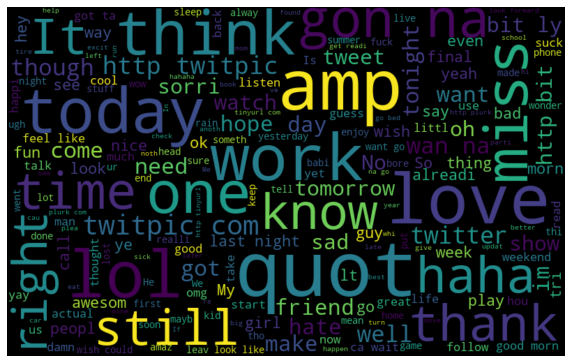

In [22]:
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

(-0.5, 799.5, 499.5, -0.5)

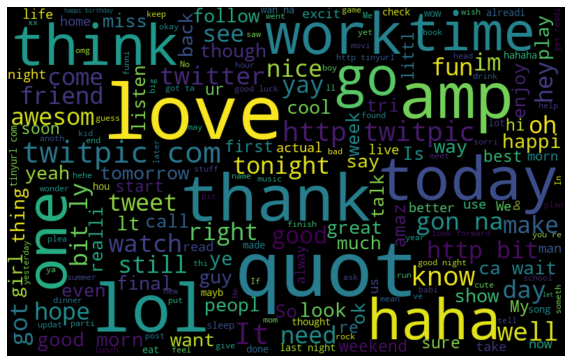

In [23]:
pos_words =' '.join([text for text in data['tokenized_text'][data['target'] == 4]])

pos_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pos_words)
plt.figure(figsize=(10, 7))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis('off')

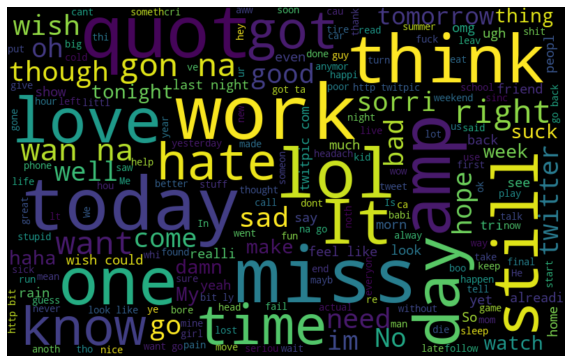

In [24]:
neg_words =' '.join([text for text in data['tokenized_text'][data['target'] == 0]])

neg_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg_words)
plt.figure(figsize=(10, 7))
plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [25]:
#Logistic regression to predict sentiments

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
ratio = int(len(data)*0.75)

logreg = LogisticRegression(random_state=2)

In [27]:
#1 - vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tweets = tfidf_vectorizer.fit_transform(data['tokenized_text'])

In [28]:
#2 - converting positive to 1 from 4
data['target'] = data['target'].apply(lambda x: 1 if x==4 else x)

In [29]:
#3 - train test split
X_train = tweets[:ratio,:]
X_test = tweets[ratio:,:]
y_train = data['target'].iloc[:ratio]
y_test = data['target'].iloc[ratio:]

In [30]:
#4 - fit model

logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
#5 - Make predictions

prediction = logreg.predict_proba(X_test)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
accuracy = accuracy_score(y_test,prediction_int)

In [32]:
print('Accuracy score:',accuracy)

Accuracy score: 0.705424


In [33]:
#Use of textblob for sentiment analysis

from textblob import TextBlob

tb_polarity = []

for sentence in data['tokenized_text']:
    temp = TextBlob(sentence)
    tb_polarity.append(temp.sentiment[0])

data['tb_polarity'] = tb_polarity

In [34]:
data.head()

,target,ids,date,flag,user,text,clean_text,tokenized_text,tb_polarity
1013875,1,1881370700,Fri May 22 04:27:56 PDT 2009,NO_QUERY,FreshPlastic,#followfriday @foyboy 1) She had Skips on her ...,#followfriday 1) She had Skips on her face ea...,followfriday 1 she skip face earlier week 2 na...,0.366667
1064419,1,1964672525,Fri May 29 14:36:52 PDT 2009,NO_QUERY,CarebearJK,@PaulaAbdul we are finally starting to see the...,we are finally starting to see the sun and wa...,final start see sun warm weather yipe,0.300000
290763,0,1995464536,Mon Jun 01 13:31:56 PDT 2009,NO_QUERY,jessicabalicki,w. all my old coworkers going to the wake RIP...,w. all my old coworkers going to the wake RIP...,w. old cowork go wake rip michel xoxo,0.100000
770144,0,2301890082,Tue Jun 23 16:03:01 PDT 2009,NO_QUERY,dlphntat,"yeah, Bravo TV. I so wanna learn more about th...","yeah, Bravo TV. I so wanna learn more about th...",yeah bravo TV I wan na learn real housew orang...,0.000000
1266526,1,1999668574,Mon Jun 01 20:36:58 PDT 2009,NO_QUERY,stevefroisland,"@JCTrick Thanks, J! I think I'm almost getting...","Thanks, J! I think I'm almost getting the han...",thank J I think I 'm almost get hang,0.000000


In [58]:
#use of vadersentiment library
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mrunal\AppData\Roaming\nltk_data...


In [60]:
analyzer = SentimentIntensityAnalyzer()

vs_polarity = []

for sentence in data['tokenized_text']:
    vs_polarity.append(analyzer.polarity_scores(sentence)['compound'])

In [61]:
data['vs_polarity'] = vs_polarity

In [62]:
data.head()

,target,ids,date,flag,user,text,clean_text,tokenized_text,tb_polarity,vs_polarity
1013875,1,1881370700,Fri May 22 04:27:56 PDT 2009,NO_QUERY,FreshPlastic,#followfriday @foyboy 1) She had Skips on her ...,#followfriday 1) She had Skips on her face ea...,followfriday 1 she skip face earlier week 2 na...,0.366667,0.4588
1064419,1,1964672525,Fri May 29 14:36:52 PDT 2009,NO_QUERY,CarebearJK,@PaulaAbdul we are finally starting to see the...,we are finally starting to see the sun and wa...,final start see sun warm weather yipe,0.300000,0.2263
290763,0,1995464536,Mon Jun 01 13:31:56 PDT 2009,NO_QUERY,jessicabalicki,w. all my old coworkers going to the wake RIP...,w. all my old coworkers going to the wake RIP...,w. old cowork go wake rip michel xoxo,0.100000,0.6124
770144,0,2301890082,Tue Jun 23 16:03:01 PDT 2009,NO_QUERY,dlphntat,"yeah, Bravo TV. I so wanna learn more about th...","yeah, Bravo TV. I so wanna learn more about th...",yeah bravo TV I wan na learn real housew orang...,0.000000,0.2960
1266526,1,1999668574,Mon Jun 01 20:36:58 PDT 2009,NO_QUERY,stevefroisland,"@JCTrick Thanks, J! I think I'm almost getting...","Thanks, J! I think I'm almost getting the han...",thank J I think I 'm almost get hang,0.000000,0.3612


## Streaming Application Programming Interfaces (APIs):

### To use tweepy library for Streaming APIs, we need to perform following steps:

Before using Tweepy as first steps, we need to create a new twitter application.

- Go to Twitter Developer Apps and log in.
- Fill the required fields - the app name, app details, etc.
- Submit the form
- Go to the API Keys tab, there you will find your Consumer key and Consumer secret keys.
- Copy the consumer key (API key) and consumer secret from the screen into our application.

Tweepy supports accessing Twitter via Basic Authentication and the newer method, OAuth. Twitter has stopped accepting Basic Authentication so OAuth is now the only way to use the Twitter API. These tokens and keys can then be used in the application. These keys are supposed to be kept confidential.

In [ ]:
# imports
from tweepy import OAuthHandler
from tweepy import API

# token keys - here the keys from twitter app need to be added
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

# Consumer key authentication
auth = OAuthHandler(consumer_key, consumer_secret)

# Access key authentication
auth.set_access_token(access_token, access_token_secret)

api  = API(auth)

### Querying the tweets

After the authentication is done, the next step is to query for the tweets and store them for further processing. We have already seen how to process the tweets and derive insights regarding the sentiment. For getting the tweets, we use the tweepy.Cursor() method. The parameters of this method are

- api: the api object we created earlier
- query: the query that will be used by Twitter to retrieve the tweets
- max_tweets: the developer account has a limit of how many requests we can do each 15 minutes. So, this option will only set a limit of how many tweets we can receive, but it can be affected by the limits imposed by Twitter to the account and by how many tweets are available for the search criteria.
- lang: The language of the tweets. We’ll use English.

We can obtain the different tweets as follows

In [ ]:
import tweepy
import csv 

# specify the query
query = 'google'

# specify the language ('en' for english)
language = 'en'

# specify the max tweets
max_tweets = 500

# specify the file path
filepath = ''

def get_tweets(filepath, api, query, max_tweets, lang='pt'):

    csvFile = open(filepath, 'a')

    #Use csv writer
    csvWriter = csv.writer(csvFile)

    for tweet in tweepy.Cursor(api.search, q = query, lang = language).items(max_tweets):

        # Write a row to the CSV file. 
        csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

    csvFile.close()

#### The tweets data is now stored at the filepath that we have specified. We have stored only the text of tweet along with the timestamp when it was created. There is a lot of other information too that comes in but for the purpose of sentiment analysis, these fields would suffice.

#### The text of streamed api is quite noisy too. One of the libraries that can help is tweet-preprocessor. It is a library for cleaning and preprocessing tweets and get the content of the tweet for further processing.

In [ ]:
# imports
!pip install tweet-preprocessor
from textblob import TextBlob as tb
import re
import preprocessor as p

# Assume that the tweets are stored into a dataframe df
all_text=[]
for x in range(df.shape[0]):
    text = p.clean(df["tweet"].iloc[x])
    text = text.replace("b","")
    text = re.sub(r'(\\x(.){2})', '',text)
    all_text.append(text)

# Use text blob to get the polarities    
polarities=[]
for x in all_text:
    blob= tb(x)
    polarities.append(blob.sentiment[0])